In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [3]:
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [4]:
gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
augment_ratio = 1.5
augment_size = int(augment_ratio * train_x.shape[0])

In [6]:
randIdx = np.random.randint(train_x.shape[0], size=augment_size)

In [7]:
augmented_x = train_x[randIdx].copy()
augmented_y = train_y[randIdx].copy()

In [8]:
augmented_x, augmented_y = gen.flow(
    augmented_x, 
    augmented_y,
    batch_size=augment_size,
    shuffle=False
).next()

In [9]:
train_x = np.concatenate((train_x, augmented_x))
train_y = np.concatenate((train_y, augmented_y))

In [10]:
s = np.arange(train_x.shape[0])
np.random.shuffle(s)

In [11]:
train_x = train_x[s]
train_y = train_y[s]

In [14]:
def CreateModel():
    inputs = Input(shape=train_x.shape[1:])
    tensor = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    tensor = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = MaxPool2D(pool_size=(2,2))(tensor)
    tensor = Dropout(0.25)(tensor)
    
    tensor = Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = MaxPool2D(pool_size=(2,2))(tensor)
    tensor = Dropout(0.25)(tensor)
    
    tensor = Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = MaxPool2D(pool_size=(2,2))(tensor)
    tensor = Dropout(0.25)(tensor)
    tensor = Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = MaxPool2D(pool_size=(2,2))(tensor)
    tensor = Dropout(0.25)(tensor)
    tensor = Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', padding='same')(tensor)
    tensor = MaxPool2D(pool_size=(2,2))(tensor)
    tensor = Dropout(0.25)(tensor)
    
    tensor = Flatten()(tensor)
    
    tensor = Dense(128, activation='relu')(tensor)
    tensor = Dropout(0.5)(tensor)
    outputs = Dense(10, activation='softmax')(tensor)

    model = Model(inputs, outputs)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [15]:
model = CreateModel()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                           

In [16]:
history = model.fit(train_x, train_y, batch_size=256, epochs=250, validation_data=(test_x, test_y))

Epoch 1/250
489/489 [==============================] - 14s 14ms/step - loss: 1.8033 - accuracy: 0.3190 - val_loss: 1.3887 - val_accuracy: 0.4848
Epoch 2/250
489/489 [==============================] - 6s 13ms/step - loss: 1.3715 - accuracy: 0.5062 - val_loss: 1.0742 - val_accuracy: 0.6135
Epoch 3/250
489/489 [==============================] - 6s 13ms/step - loss: 1.1747 - accuracy: 0.5852 - val_loss: 0.9101 - val_accuracy: 0.6748
Epoch 4/250
489/489 [==============================] - 6s 13ms/step - loss: 1.0557 - accuracy: 0.6321 - val_loss: 0.8276 - val_accuracy: 0.7118
Epoch 5/250
489/489 [==============================] - 6s 13ms/step - loss: 0.9739 - accuracy: 0.6642 - val_loss: 0.7866 - val_accuracy: 0.7145
Epoch 6/250
489/489 [==============================] - 6s 13ms/step - loss: 0.9105 - accuracy: 0.6870 - val_loss: 0.6784 - val_accuracy: 0.7655
Epoch 7/250
489/489 [==============================] - 6s 13ms/step - loss: 0.8634 - accuracy: 0.7038 - val_loss: 0.6640 - val_accuracy

### 86.18 %

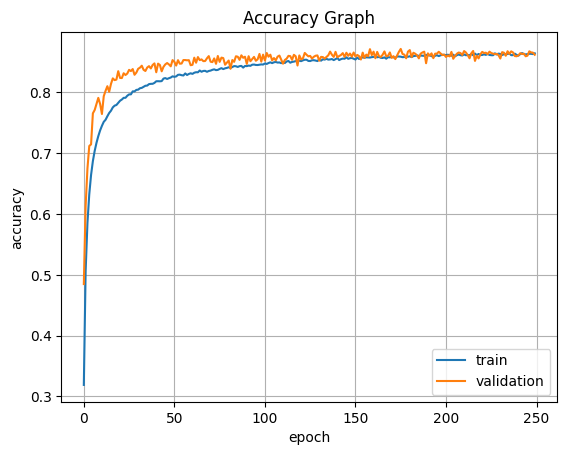

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

In [18]:
model.save('86_18.model')
# new_model = tf.keras.models.load_model('86_18.model')

INFO:tensorflow:Assets written to: 86_18.model\assets


INFO:tensorflow:Assets written to: 86_18.model\assets


In [ ]:
https://m.blog.naver.com/beyondlegend/222345469147